In [ ]:
"""
Diego Armando Sarmiento Ahumada
301379640
Unsupervised Learning - Section 001
"""

## Excercise 1

In [19]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

1. Retrieve and load the mnist_784 dataset of 70,000 instances.

In [20]:
# Load the dataset
mnist = fetch_openml('mnist_784', version=1)
df_mnist = pd.DataFrame(mnist.data)
df_mnist['target'] = mnist.target

print(mnist.data.shape)
print(mnist.keys())

(70000, 784)
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


2. Display each digit.

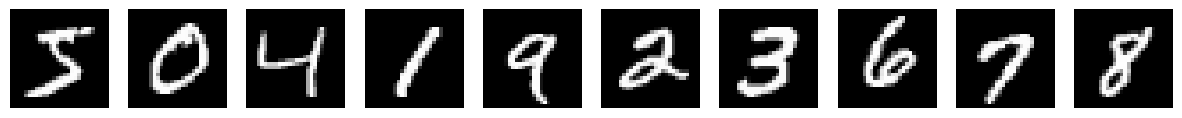

In [21]:
# Plot unique digits
df_mnist = df_mnist.apply(pd.to_numeric)

unique_digits = df_mnist['target'].unique()
fig, axes = plt.subplots(1, len(unique_digits), figsize=(15, 5))
for i, digit in enumerate(unique_digits):
    digit = df_mnist[df_mnist['target'] == digit].index[0]
    digit_image = df_mnist.iloc[digit, :-1].values.reshape(28, 28).astype(float)
    axes[i].imshow(digit_image, cmap='gray')
    axes[i].axis('off')

plt.show()

3. Use PCA to retrieve the 1th and 2nd principal component and output their explained variance ratio.

In [22]:
# PCA to retrieve the first two principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_mnist.iloc[:, :-1])
explained_variance_ratio = pca.explained_variance_ratio_

print(f'Explained variance ratio: {explained_variance_ratio}')

Explained variance ratio: [0.09746116 0.07155445]


4. Plot the projections of the and principal component onto a 2D hyperplane.

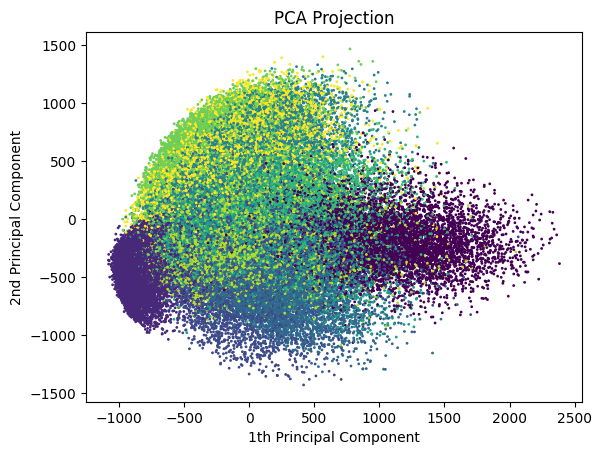

In [23]:
# Plot the projections of the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_mnist.iloc[:, -1].astype(int), cmap='viridis', s=1)
plt.xlabel('1th Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('PCA Projection')
plt.show()

5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.

In [24]:
# Incremental PCA to reduce dimensionality to 154 dimensions
incremental_pca = IncrementalPCA(n_components=154)
incremental_pca_result = incremental_pca.fit_transform(df_mnist.iloc[:, :-1])

6. Display the original and compressed digits from (5).

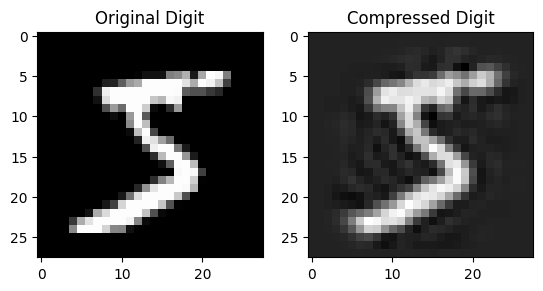

In [25]:
# Display original and compressed digits
original_digit = df_mnist.iloc[0, :-1].values.reshape(28, 28)
compressed_digit = incremental_pca.inverse_transform(incremental_pca_result[0]).reshape(28, 28)
    
fig, axes = plt.subplots(1, 2)
axes[0].imshow(original_digit, cmap='gray')
axes[0].set_title('Original Digit')
axes[1].imshow(compressed_digit, cmap='gray')
axes[1].set_title('Compressed Digit')
plt.show()